In [31]:
def sign(inp):
    if inp<0:
        return -1
    elif inp==0:
        return 0
    elif inp>0:
        return 1
def motionProfiling(minSpeed, maxSpeed, acc, dist, curDegrees):
    if maxSpeed<minSpeed:
        maxSpeed = minSpeed
    speed = minSpeed
    negative = False
    if dist<0:
        dist*=-1
        negative = True
        curDegrees*=-1
    err = dist-curDegrees
    y = maxSpeed-minSpeed
    y/=2
    if err<0:
        if err>-(y/acc)**0.5:
            speed = -acc*err*err-minSpeed
        elif err>-2*(y/acc)**0.5:
            err = err+2*(y/acc)**0.5
            speed = acc*err*err-maxSpeed
        else:
            speed = -1*maxSpeed
    elif err>0:
        if err<(y/acc)**0.5 and err<dist/2:
            speed = acc*err*err+minSpeed
        elif err<2*(y/acc)**0.5 and err<dist/2:
            err = err-2*(y/acc)**0.5
            speed = -acc*err*err+maxSpeed
        elif err>=dist+2*(y/acc)**0.5:
            speed = maxSpeed
        elif err>dist-(y/acc)**0.5 and err<dist+(y/acc)**0.5:
            err = err-dist
            speed = acc*err*err+minSpeed
        elif err>dist+(y/acc)**0.5:
            err = err-dist-2*(y/acc)**0.5
            speed = -acc*err*err+maxSpeed
        elif err>dist-2*(y/acc)**0.5 and err<dist:
            err = err-dist+2*(y/acc)**0.5
            speed = -acc*err*err+maxSpeed
        else:
            speed = maxSpeed
    else:
        speed = 0
    if negative:
        speed*=-1
    return speed

In [32]:
def getSpeeds(minSpeed, maxSpeed, acc, dist, curDegrees, speed2):
    ratio = 0
    if speed2==0:
        ratio = 1000000000
    else:
        ratio = maxSpeed/speed2
    return (motionProfiling(max(minSpeed, 10), maxSpeed, acc, dist, curDegrees), motionProfiling(abs(max(minSpeed/ratio, 10)), abs(maxSpeed/ratio), abs(acc/ratio), dist*sign(ratio), curDegrees*abs(ratio)))

In [33]:
import matplotlib.pyplot as plt

In [34]:
x = list(range(1500, -1500, -1))
y = [getSpeeds(15, 80, 0.001, 600, i, 40) for i in x]

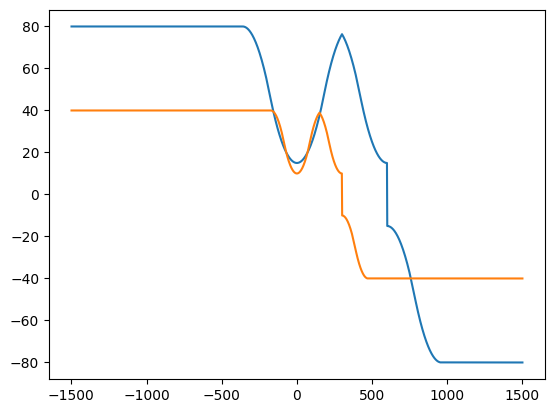

In [35]:
plt.plot(x, y)